# Decision Tree Classification Lab

## Setup Notebook

In [266]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.tree import plot_tree

print("Setup complete.")

Setup complete.


## Data exploration

### Load the data

In [267]:
# Read data
df_loans = pd.read_csv('Loans_Dataset.csv')

# Display the first five rows
df_loans.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [268]:
# Describe data
df_loans.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


In [269]:
# Describe data
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


In [270]:
# Count the number of unique values in each column
df_loans.nunique()

initial_payment    370
last_payment       920
credit_score       616
house_number       776
sum                905
result               2
dtype: int64

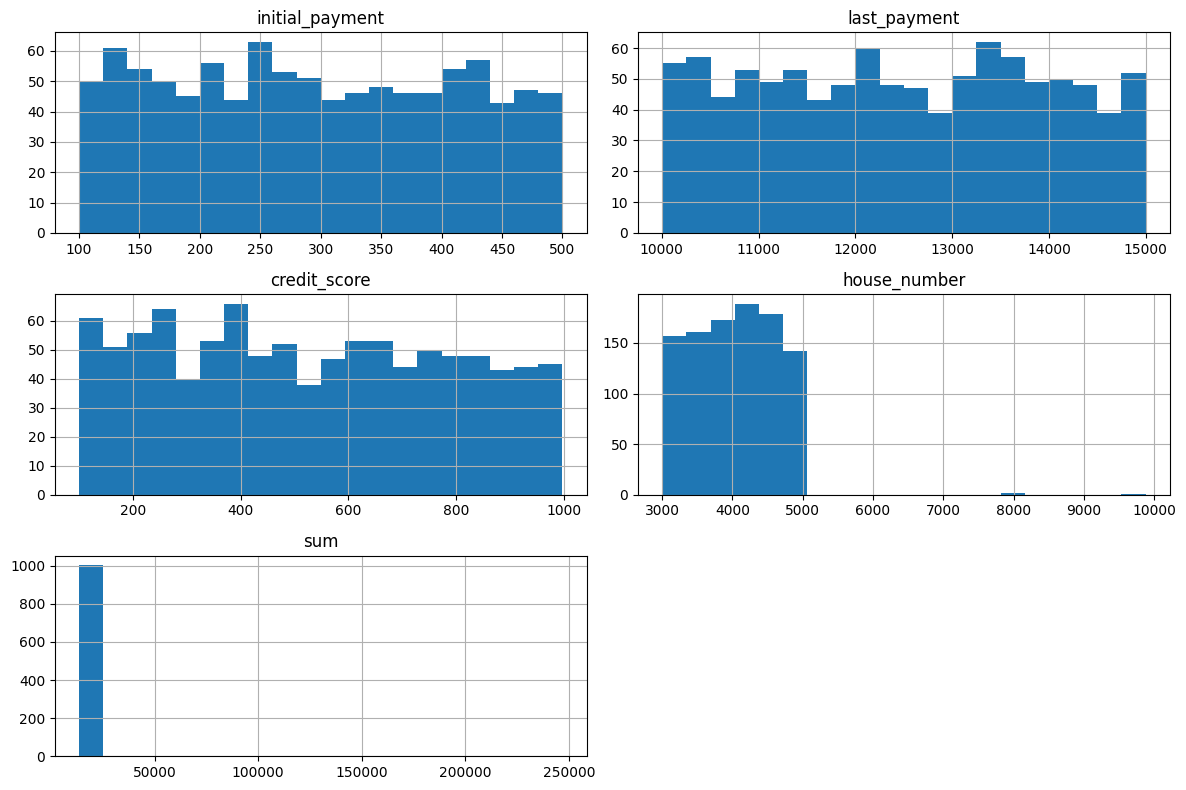

In [271]:
# Histogram for numerical features
df_loans.hist(bins=20, figsize=(12,8))
plt.tight_layout()
plt.show()

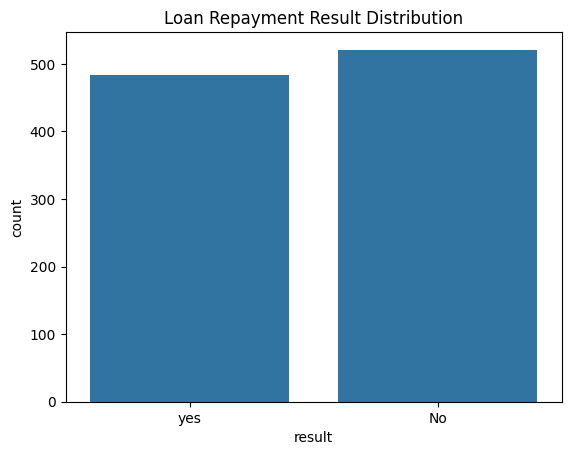

In [272]:
# Countplot for result
sns.countplot(x='result', data=df_loans)
plt.title('Loan Repayment Result Distribution')
plt.show()

## Preprocessing

### Check for missing values

In [273]:
# Check for missing values
df_loans.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

### Encode results column

In [274]:
# Label encoding
le = LabelEncoder()
df_loans['result']= le.fit_transform(df_loans['result'])

### Create correlation matrix

In [275]:
# Correlation matrix
df_loans.corr()


,initial_payment,last_payment,credit_score,house_number,sum,result
initial_payment,1.000000,-0.013536,-0.009421,0.071100,0.050698,-0.048464
last_payment,-0.013536,1.000000,-0.000805,0.057410,0.213237,-0.805640
credit_score,-0.009421,-0.000805,1.000000,0.034885,0.068387,-0.076326
house_number,0.071100,0.057410,0.034885,1.000000,0.412303,-0.202827
sum,0.050698,0.213237,0.068387,0.412303,1.000000,-0.092830
result,-0.048464,-0.805640,-0.076326,-0.202827,-0.092830,1.000000


<Axes: >

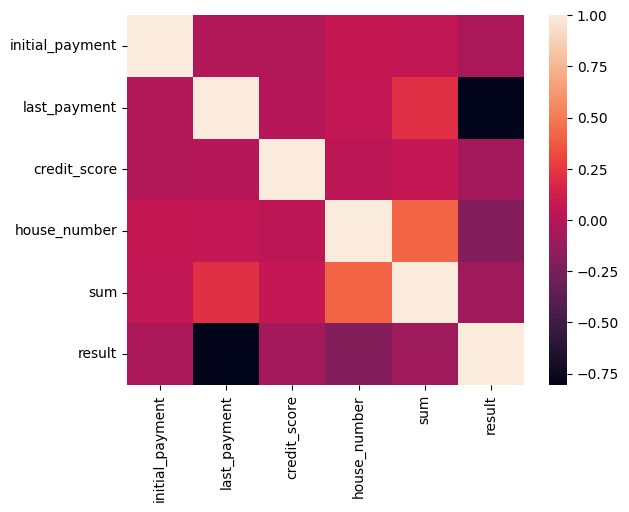

In [276]:
sns.heatmap(df_loans.corr())

### Drop columns not needed

In [277]:
# Drop the 'house_number' column as it is not needed
df_loans.drop(columns = ['house_number'], inplace=True)
df_loans.head()

,initial_payment,last_payment,credit_score,sum,result
0,201,10018,250,13515,1
1,205,10016,395,13660,1
2,257,10129,109,13746,1
3,246,10064,324,13771,1
4,117,10115,496,13822,1


## Modeling: Decision Tree Classifier

### Independent/Dependent variables

In [278]:
# Define features and target
X = df_loans.drop('result', axis=1)
y = df_loans['result']

### Train/Test sets

In [279]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature Scaling

In [280]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Train model

In [281]:
clf = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=4, min_samples_leaf=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=100)

### Display decision tree

[Text(0.4, 0.8333333333333334, 'x[3] <= -0.058\nentropy = 0.999\nsamples = 753\nvalue = [392, 361]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 357\nvalue = [0, 357]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 0.24\nentropy = 0.081\nsamples = 396\nvalue = [392, 4]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 391\nvalue = [391, 0]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.722\nsamples = 5\nvalue = [1, 4]')]

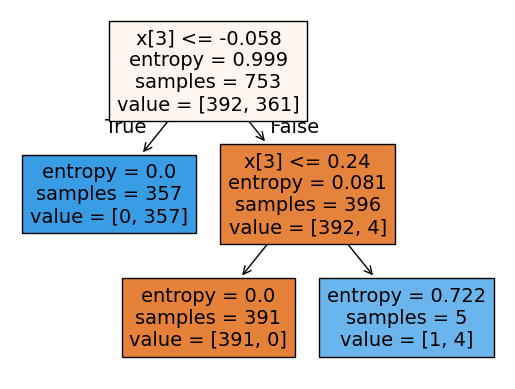

In [282]:
# Display the decision tree
plot_tree(clf, filled=True)

In [283]:
# Predict on the test set
y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), np.array(y_test).reshape(len(y_test), 1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

## Evaluate the model

### Accuracy

In [284]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9920318725099602


### Confusion Matrix

<Axes: >

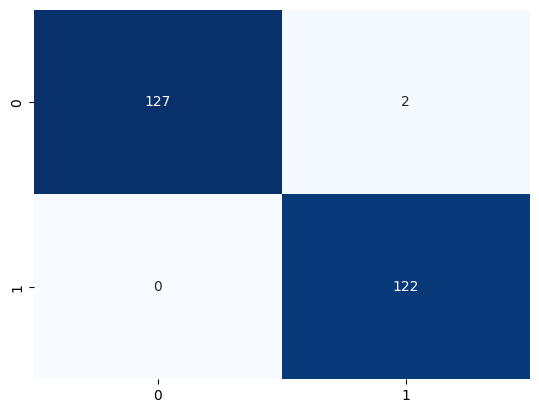

In [285]:
# Confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

### Classification Report

In [286]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       129
           1       0.98      1.00      0.99       122

    accuracy                           0.99       251
   macro avg       0.99      0.99      0.99       251
weighted avg       0.99      0.99      0.99       251



## F1 Score

In [287]:
# F1 Score
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

F1 Score: 0.9920331377741068
